In [100]:
import h5py
import matplotlib.pyplot as plt
import h5py
import matplotlib.pyplot as plt
import numpy as np



Shows h5 dataset names

In [101]:

file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'

with h5py.File(file_path, 'r') as file:
    # Print dataset names
    print("Dataset names:")
    for dataset_name in file:
        print(dataset_name)

Dataset names:
ismrmrd_header
kspace
reconstruction_rss


Artificial undersampling method. Sets certain columns of an image to 0. 

In [121]:
def undersample_kspace(k_space_data, undersampling_factor):
    # Determine the number of lines to keep
    num_lines_to_keep = int(k_space_data.shape[0] / undersampling_factor)
    
    # Randomly select indices to keep
    indices_to_keep = np.random.choice(k_space_data.shape[0], num_lines_to_keep, replace=False)
    
    # Create a mask to zero out the unselected lines
    mask = np.zeros_like(k_space_data, dtype=bool)
    mask[indices_to_keep, :] = True
    
    # Apply the mask to the k-space data
    undersampled_kspace = k_space_data * mask
    
    return undersampled_kspace, mask

In [122]:
def evenly_spaced_undersample_kspace(k_space_data, undersampling_factor):
    # Determine the number of lines to keep
    num_lines_to_keep = int(k_space_data.shape[0] / undersampling_factor)
    
    # Calculate the step size to evenly space out the lines
    step_size = int(k_space_data.shape[0] / num_lines_to_keep)
    
    # Create a mask to zero out the unselected lines
    mask = np.zeros_like(k_space_data, dtype=bool)
    mask[::step_size, :] = True
    
    # Apply the mask to the k-space data
    undersampled_kspace = k_space_data * mask
    
    return undersampled_kspace, mask

In [131]:

def poisson_undersample_kspace(image, factor):
    """
    Poisson-distributed undersampling of k-space.
    
    Parameters:
        image (numpy.ndarray): Input k-space image.
        factor (int): Undersampling factor.
    
    Returns:
        numpy.ndarray: Undersampled k-space image.
        numpy.ndarray: Generated Poisson-distributed mask.
    """
    mask = np.random.poisson(lam=1, size=image.shape)
    undersampled_image = image * mask
    return undersampled_image, mask

In [141]:
def gaussian_undersample_kspace(image, factor, mean=0, std=1):
    """
    Gaussian-distributed noise undersampling of k-space.
    
    Parameters:
        image (numpy.ndarray): Input k-space image.
        factor (int): Undersampling factor.
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
    
    Returns:
        numpy.ndarray: Undersampled k-space image.
        numpy.ndarray: Generated Gaussian-distributed noise mask.
    """
    mask = np.random.normal(loc=mean, scale=std, size=image.shape)
    undersampled_image = image * mask
    return undersampled_image, mask

In [134]:
def radial_undersample_kspace(image, factor):
    """
    Radial undersampling of k-space.
    
    Parameters:
        image (numpy.ndarray): Input k-space image.
        factor (int): Undersampling factor.
    
    Returns:
        numpy.ndarray: Undersampled k-space image.
        numpy.ndarray: Generated radial undersampling mask.
    """
    rows, cols = image.shape
    mask = np.zeros_like(image)
    center_row, center_col = rows // 2, cols // 2
    
    for i in range(rows):
        for j in range(cols):
            if (i - center_row) ** 2 + (j - center_col) ** 2 < (factor * rows / 2) ** 2:
                mask[i, j] = 1
                
    undersampled_image = image * mask
    return undersampled_image, mask

Shows a magnitude image

In [102]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def display_mri_image(file_path, dataset_name, slice_index=0, coil_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Select a specific slice for display
        selected_slice = mri_data[slice_index, coil_index]
        # Perform the inverse Fourier transform (IFFT)
        image_data = np.fft.ifftn(selected_slice)

        # Shift the zero-frequency component to the center
        shifted_image = np.fft.fftshift(image_data)

        # Display the magnitude of the complex MRI data
        magnitude_data = np.abs(shifted_image)
        plt.imshow(magnitude_data, cmap='gray')
        plt.title('MRI Image Magnitude')
        plt.axis('off')  # Turn off axis labels
        plt.show()



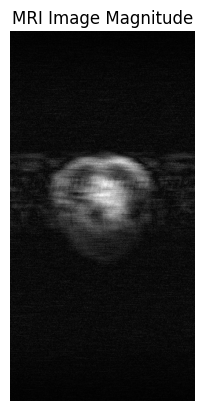

In [103]:
# Provide the path to your .h5 file and the dataset name
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'
#file_path = '/home/willdong/hpchome/modl/multicoil_test/file_brain_AXFLAIR_200_6002441.h5'
dataset_name = 'kspace'

# Call the function to display the MRI image
display_mri_image(file_path, dataset_name, 10, 10)

Shows a phase image

In [104]:
def display_mri_image(file_path, dataset_name, slice_index=0, coil_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Select a specific slice for display
        selected_slice = mri_data[slice_index, coil_index]
        # Perform the inverse Fourier transform (IFFT)
        image_data = np.fft.ifftn(selected_slice)

        # Shift the zero-frequency component to the center
        shifted_image = np.fft.fftshift(image_data)

        # Compute the phase of the complex MRI data
        phase_data = np.angle(shifted_image)

        # Display the phase image
        plt.imshow(phase_data, cmap='gray')
        plt.title('MRI Image Phase')
        plt.axis('off')  # Turn off axis labels
        plt.show()

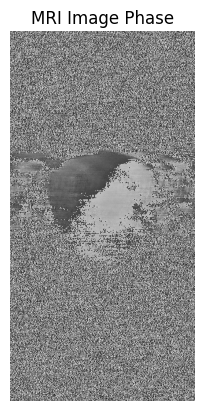

In [105]:
# Provide the path to your .h5 file and the dataset name
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'
#file_path = '/home/willdong/hpchome/modl/multicoil_test/file_brain_AXFLAIR_200_6002441.h5'
dataset_name = 'kspace'

# Call the function to display the MRI image
display_mri_image(file_path, dataset_name, 10, 10)

Shows all 16 coils of the magnitude image

In [150]:
def display_mri_images(file_path, dataset_name, slice_index=0):
    # Open the .h5 file
    with h5py.File(file_path, 'r') as file:
        # Access the complex MRI dataset
        mri_data = file[dataset_name][:]

        # Determine the number of coils
        num_coils = mri_data.shape[0]

        # Create subplots for each slice
        num_rows = 4
        num_cols = num_coils // num_rows + (num_coils % num_rows > 0)
        fig, axes = plt.subplots(num_rows, 2*num_cols, figsize=(15, 15))

        # Loop through each coil and display it
        for i in range(num_coils):
            row = i // num_cols
            col = i % num_cols
            # Select a specific coil of a slice for display
            selected_slice = mri_data[slice_index, i]
            
            # Undersample, 5 is the undersampling factor
            #selected_slice, mask = evenly_spaced_undersample_kspace(selected_slice, 5)            
            selected_slice, mask = undersample_kspace(selected_slice, 2)
            #selected_slice, mask = poisson_undersample_kspace(selected_slice, 5)
            #selected_slice, mask = gaussian_undersample_kspace(selected_slice, 5)
            #selected_slice, mask = radial_undersample_kspace(selected_slice, 5)



            # Perform the inverse Fourier transform (IFFT)
            image_data = np.fft.ifftn(selected_slice)

            # Shift the zero-frequency component to the center
            shifted_image = np.fft.fftshift(image_data)
            mag_data = np.abs(shifted_image)
            axes[row, 2*col].imshow(mag_data, cmap='gray')
            axes[row, 2*col].set_title(f'Coil {i+1}')
            axes[row, 2*col].axis('off')
            
            # Show the mask
            axes[row, 2*col + 1].imshow(mask, cmap='gray')
            axes[row, 2*col + 1].set_title('Mask')
            axes[row, 2*col + 1].axis('off')

        # Hide any empty subplots
        for i in range(num_coils, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axes[row, 2*col].axis('off')
            axes[row, 2*col + 1].axis('off')

        plt.tight_layout()
        plt.show()

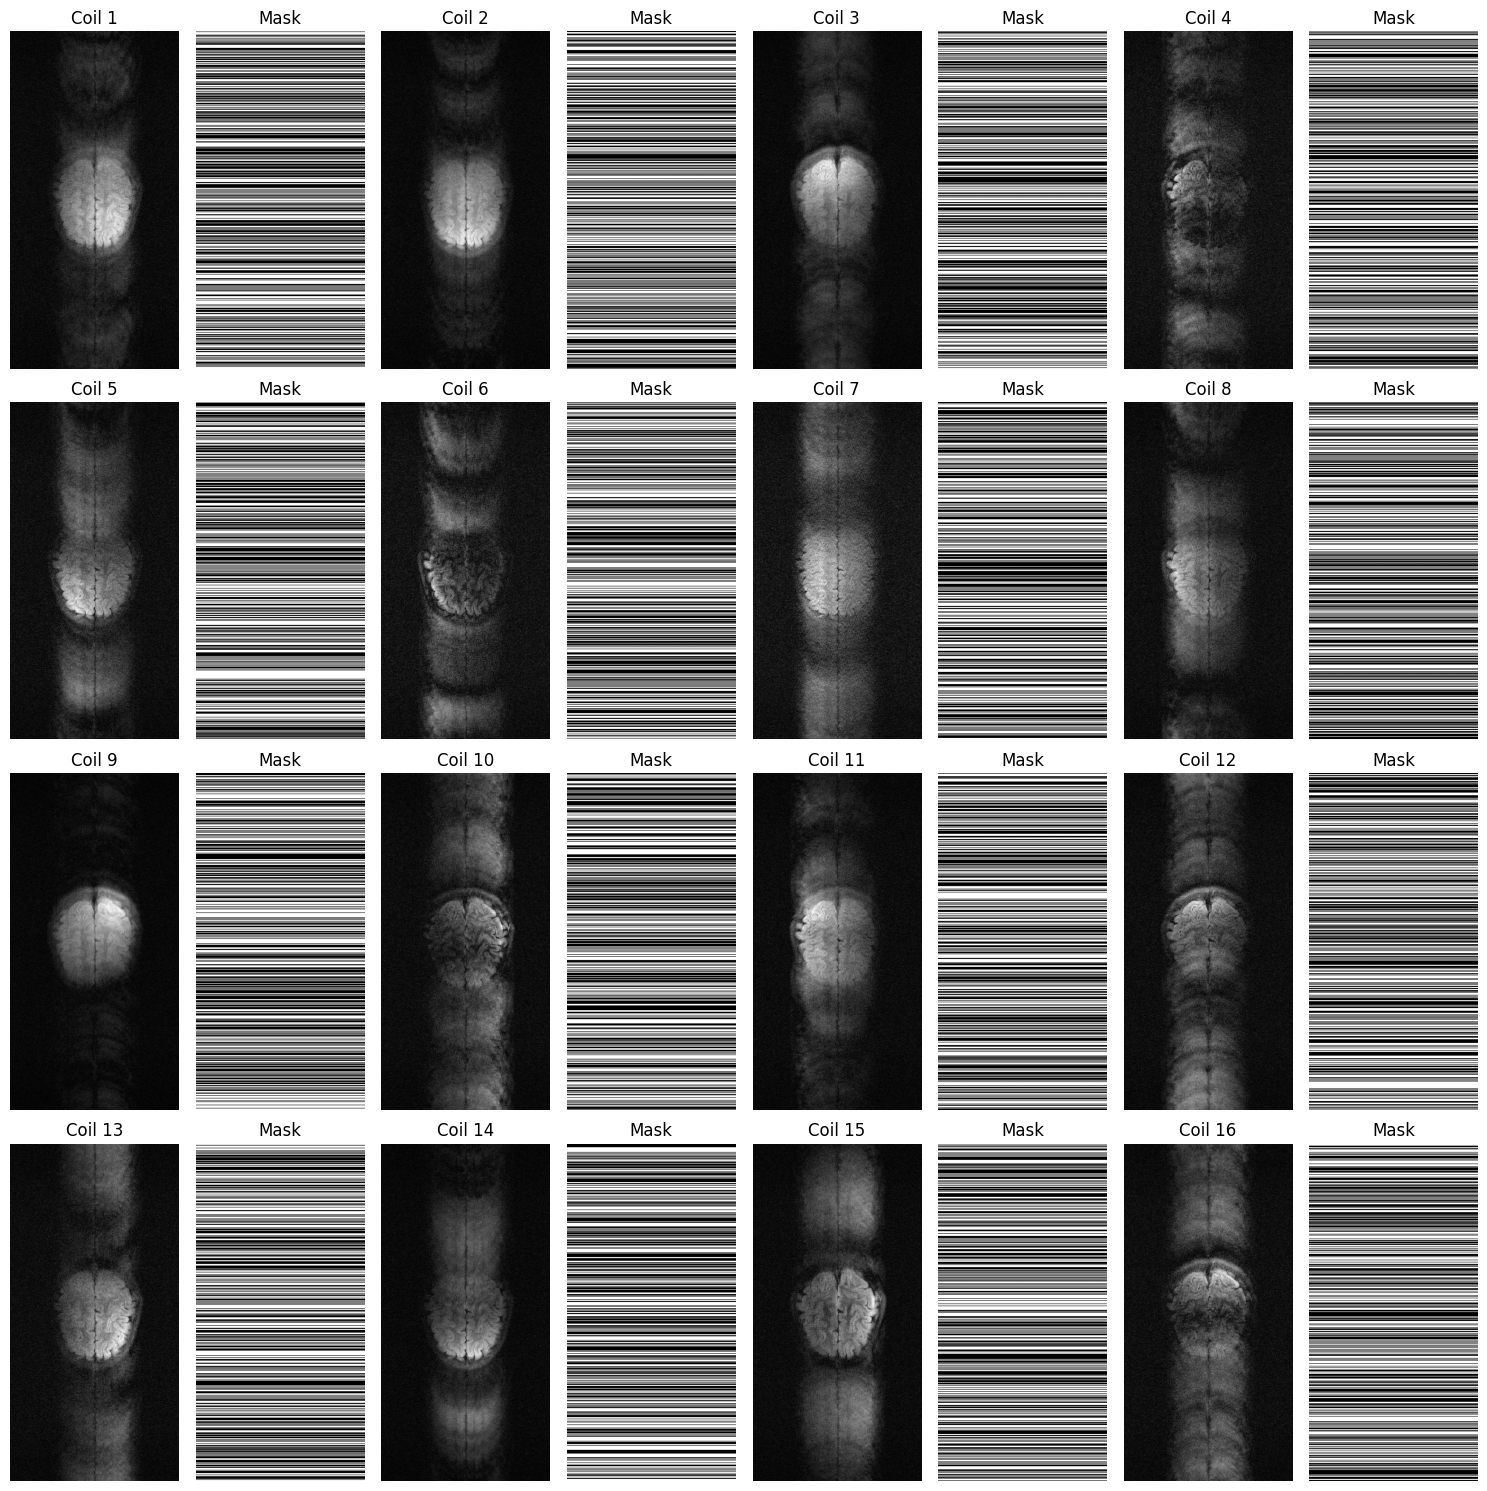

In [151]:
# Example usage
file_path = '/home/willdong/hpchome/modl/multicoil_train_1/file_brain_AXFLAIR_200_6002442.h5'
#file_path = '/home/willdong/hpchome/modl/multicoil_test/file_brain_AXFLAIR_200_6002441.h5'

dataset_name = 'kspace'
display_mri_images(file_path, dataset_name, 10)